In [20]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns #for matrix
%matplotlib inline

In [21]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]


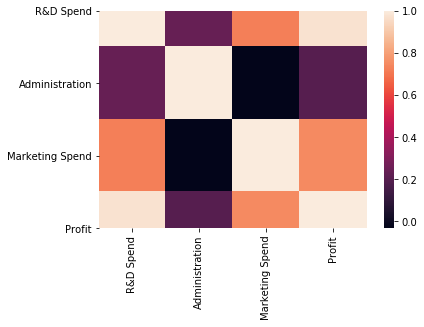

In [23]:
#data visualisation
sns.heatmap(dataset.corr()) #Plot rectangular data as a color-encoded for correlation matrix.

In [24]:
# categorical variables converted to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #integer-encoding of categorical column using the LabelEncoder
datasetlabel_encoder = dataset
datasetlabel_encoder.State = label_encoder.fit_transform(datasetlabel_encoder.State)
datasetlabel_encoder

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
X = datasetlabel_encoder[['State','Profit']].values
X

array([[2.0000000e+00, 1.9226183e+05],
       [0.0000000e+00, 1.9179206e+05],
       [1.0000000e+00, 1.9105039e+05],
       [2.0000000e+00, 1.8290199e+05],
       [1.0000000e+00, 1.6618794e+05],
       [2.0000000e+00, 1.5699112e+05],
       [0.0000000e+00, 1.5612251e+05],
       [1.0000000e+00, 1.5575260e+05],
       [2.0000000e+00, 1.5221177e+05],
       [0.0000000e+00, 1.4975996e+05],
       [1.0000000e+00, 1.4612195e+05],
       [0.0000000e+00, 1.4425940e+05],
       [1.0000000e+00, 1.4158552e+05],
       [0.0000000e+00, 1.3430735e+05],
       [1.0000000e+00, 1.3260265e+05],
       [2.0000000e+00, 1.2991704e+05],
       [0.0000000e+00, 1.2699293e+05],
       [2.0000000e+00, 1.2537037e+05],
       [1.0000000e+00, 1.2426690e+05],
       [2.0000000e+00, 1.2277686e+05],
       [0.0000000e+00, 1.1847403e+05],
       [2.0000000e+00, 1.1131302e+05],
       [1.0000000e+00, 1.1035225e+05],
       [1.0000000e+00, 1.0873399e+05],
       [2.0000000e+00, 1.0855204e+05],
       [0.0000000e+00, 1.

In [7]:
y = datasetlabel_encoder.Profit.values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

In [19]:
X = ohe.fit_transform(X).toarray() #fit_transform methods require array objects with shape (m, n) to be passed
X

C:\Users\nusrat\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\nusrat\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.9226183e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.9179206e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.9105039e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.8290199e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.6618794e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.5699112e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5612251e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.5575260e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.5221177e+05],
       [1.0000000e+00, 0.0000000e+00,

In [10]:
X = X[:,1:]
X

array([[0.0000000e+00, 1.0000000e+00, 1.9226183e+05],
       [0.0000000e+00, 0.0000000e+00, 1.9179206e+05],
       [1.0000000e+00, 0.0000000e+00, 1.9105039e+05],
       [0.0000000e+00, 1.0000000e+00, 1.8290199e+05],
       [1.0000000e+00, 0.0000000e+00, 1.6618794e+05],
       [0.0000000e+00, 1.0000000e+00, 1.5699112e+05],
       [0.0000000e+00, 0.0000000e+00, 1.5612251e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5575260e+05],
       [0.0000000e+00, 1.0000000e+00, 1.5221177e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4975996e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4612195e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4425940e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4158552e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3430735e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3260265e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2991704e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2699293e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2537037e+05],
       [1.0000000e+00, 0.000

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [14]:
#To retrieve the intercept:
print(regressor.intercept_)



-4.3655745685100555e-11


In [15]:
#For retrieving the slope:
print(regressor.coef_)

[ 1.50128523e-12 -5.15909537e-12  1.00000000e+00]


In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred) #predict-mean/actual-mean
print(score)

1.0
